This page gives you the actual data from Terri Kneeland's experiment on the ring game.  The problem is to figure out whether there is any difference between a player who can successfully delete dominated strategies, and a player who best replies to the actual distrbution of play by other players in the experiment.


Apart from providing the data, this page will show you some simple python commands you can use to interpret the data. Then we can do some computations using sagemath.


The first bit just loads some python libraries (particularly pandas - tons of documentation about it on the internet).  The os library is for reading files.

In [3]:
import pandas as pd
import os
dataset = pd.read_csv('ecma_data.csv')

In [4]:
show(dataset)

You can find Terri's experiment at [https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf](https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf).  In the game described in that experiment, each of the lettered actions are replaced by a number, either 1,2 or 3.  For example, when a subject is playing as Player 4 in game 1, the actions k,l,m are replaced by 1,2,3 in the table above. 


Now list the columns that are contained in the table so you know how to refer to them.  You use the letters contained between the single quotes.

In [5]:
dataset.columns

Index([u'Subject', u'G1P1', u'G1P2', u'G1P3', u'G1P4', u'G2P1', u'G2P2',
       u'G2P3', u'G2P4'],
      dtype='object')

One way to visualize the data is to draw a histogram of the data in the column named 'G1P4', which gives the choices that the subjects made playing as Player 4 in game 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd773053150>]], dtype=object)

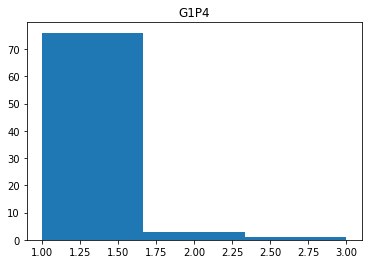

In [6]:
dataset.hist('G1P4',bins=3,grid=false)

A better way to do it here is this way.

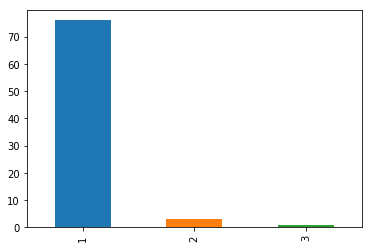

In [7]:
dataset['G1P4'].value_counts().plot(kind='bar')


Of course, we need the raw counts here, so we could also do:

In [8]:
ds = dataset['G1P4'].value_counts(normalize=true)
show(ds) 


Or, if you just want the counts themselves, you would do it this way.

In [9]:
dataset['G1P4'].value_counts()

1    76
2     3
3     1
Name: G1P4, dtype: int64

If you can't see from the code, those are counts of the number of subjects who chose actions 1, 2 or 3 (k,l or m) when they were playing as Player 4 in game 1.  Recall the dominant strategy was action k, or 1.  Most people did that.


Now what we would like to do is to look at subjects who acting as Player 3 and calculate the best reply against this empirical distribution.  Theoretically, a Nash equilibrium is supposed to have the property that each player correctly guesses the probablity with which their opponent will take each of his or her possible actions. If $\pi_1, \pi_2$ and $1-\pi_1-\pi_2$ are the probabilities with which subjects in the rest of the group use action 1(k) or 2(1) or 3(m), then we would use the calculation 
$$
20\pi_1 + 14\pi_2 +8(1-\pi_1-\pi_2)
$$ 
to be the expected payoff associated with using action 1(h).  A similar calculation applies to the other two actions 2 and 3 (j or k in the reading).


Now revert to sagemath to do the calculation as follows.

In [10]:
n((76/80)*20+(3/80)*14+(1/80)*8)

19.6250000000000

If you leave out the n() you get the answer as a fraction.  Now we can do the same thing for action i (2):

In [12]:
n((76/80)*16+(3/80)*2+(1/80)*18)

15.5000000000000

Evidently, the best reply to the distribution of actions of the other subjects is the same as the action you get from iterated deletion of dominated strategies, at least when you are playing as Player 3.  The problem is to figure out whether this is true for the Players in the other positions and whether it is true for both games.  Use the sample code here to figure out an answer. 

The second part of this project is to try to test an alternative model with this data.  In particular, we'll assume that players just lose interest sometimes, otherwise, they find their actions using iterated deletion of dominated strategies. To illustrate, suppose you are acting as player 3, and you believe that player 4 will play his or her dominant action with probability $\rho_4$.  With probability $1-\rho_4$, you believe the player just chooses each of his or her actions with equal probability. 


As above, this means your payoff when you play action 1(h) is
$$
20\rho_1+(1-\rho_1)(\frac{20+14+8}{3})
$$


What you need to try to figure out is two things. What value of $\rho_1$ makes the realized distribution of outcomes {76,3,1} most likely?  Second how high does $\rho_1$ have to be in order that action 2 becomes a best reply.


In particular, for this second question, the payoff to using action 2 is
$$
16\rho_1+(1-\rho_1)\frac{16+2+18}{3}
$$
What value of $\rho_1$ makes this the same as the payoff to action 1 described above.  If $\rho$ takes this value, what is the probability that the realized data would come out the way it did.


Of course, we would like to know these same things for the other players.  To do this, it seems reasonable to assume that the probability $\rho_3$ that applies when player 2 is thinking about player 3 is different than $\rho_4$.  Intuitively it would seem it should be a little higher, but that is to be checked by looking at the data.  Assume when you do this that the probability that a player is inattentive as Player 3 is independent of whether they were independent as player 4.